In [1]:
from drn_interactions.load import get_fig_dir, load_events, load_neurons_derived
from drn_interactions.spikes import SpikesHandlerMulti
from drn_interactions.fs_slow import (
    SlowTSRespondersMixed, SlowTSRespondersAnova, plot_pop
)

import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
import pandas as pd
from IPython.display import display

%load_ext autoreload
%autoreload 2

In [2]:

sns.set_theme(context="poster", style="ticks")
outdir = get_fig_dir() / "base_shock"
outdir.mkdir(exist_ok=True, parents=True)

neurons = load_neurons_derived()
clusters = neurons[["neuron_id", "wf_3"]]
events = load_events("base_shock")
sessions = neurons[["session_name"]].drop_duplicates().merge(events[["session_name"]].drop_duplicates())["session_name"].unique()
# [plot_pop(session, z=True) for session in sessions]

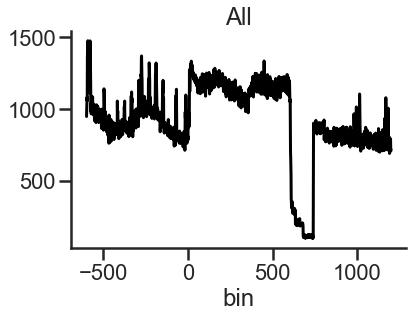

In [13]:
# Long timescale
t_start=-600
t_stop=1200
bin_width=1
session = sessions


sh = SpikesHandlerMulti(
    block=["base_shock", "post_base_shock"], 
    bin_width=bin_width, 
    session_names=sessions.tolist(),
    t_start=t_start, 
    t_stop=t_stop,
)
ax = sh.binned_piv.sum(axis=1).plot(color="black")
ax.set_title("All")
sns.despine()
df_binned_piv = sh.binned_piv.copy()

In [15]:
# mixed effects
mod = SlowTSRespondersMixed()
mod.get_responders(df_binned_piv, clusters = neurons[["neuron_id","wf_3"]])
display(mod.results_["anova"])

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,SS,MS,NumDF,DenomDF,F-stat,P-val,Sig
block,41.836,20.918,2,235.157,28.359,0.000,***
wf_3,0.000,0.000,2,311233.115,0.000,1.000,
block:wf_3,5.376,1.344,4,235.157,1.822,0.125,


In [16]:
mod = SlowTSRespondersMixed()
mod.get_responders(df_binned_piv)
display(mod.results_["anova"])
display(mod.results_["emms"])
display(mod.results_["contrasts"])
# mod.plot()

boundary (singular) fit: see help('isSingular') 

P-values adjusted by tukey method for family of 3 estimates
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,SS,MS,NumDF,DenomDF,F-stat,P-val,Sig
block,173.931,86.966,2,236.967,117.903,0.0,***


,block,Estimate,2.5_ci,97.5_ci,SE,DF
1,pre,0.116,0.061,0.171,0.028,inf
2,1,0.247,0.182,0.313,0.033,inf
3,2,-0.364,-0.410,-0.317,0.024,inf


,Contrast,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
1,pre - 1,-0.131,-0.264,0.002,0.057,inf,-2.315,0.054,.
2,pre - 2,0.480,0.386,0.573,0.040,inf,12.007,0.000,***
3,1 - 2,0.611,0.493,0.730,0.051,inf,12.081,0.000,***


In [33]:
# Reapeated measures

mod = SlowTSRespondersAnova()
mod.get_responders(df_binned_piv=df_binned_piv, clusters=neurons[["neuron_id", "wf_3"]],)
display(mod.results_["anova"])
display(mod.results_["contrasts"])

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,wf_3,0.000,2,235,0.000,2.178,0.116,NaN,0.018,NaN,NaN,NaN,NaN
1,block,49.251,2,470,24.625,84.712,0.000,0.0,0.265,0.871,False,0.852,0.0
2,Interaction,2.063,4,470,0.516,1.774,0.133,NaN,0.015,NaN,NaN,NaN,NaN


In [42]:
mod = SlowTSRespondersAnova()
mod.get_responders(df_binned_piv=df_binned_piv, fit_unit_level_models=True)
display(mod.results_["anova"])
display(mod.results_["contrasts"])

100%|██████████| 238/238 [00:26<00:00,  8.84it/s]


,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,block,2,474,84.162,0.0,0.0,0.262,0.871,False,0.852,0.0


,Contrast,A,B,T,dof,p-corr,p-adjust,p,Sig
0,block,1pre,2shock,-2.315,237.0,0.021,fdr_bh,0.021,*
1,block,1pre,3post,12.006,237.0,0.000,fdr_bh,0.000,*
2,block,2shock,3post,12.086,237.0,0.000,fdr_bh,0.000,*


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\roryl\AppData\Local\Temp\ipykernel_11860\4279790765.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


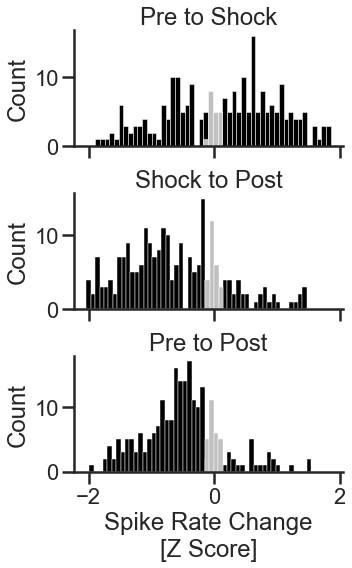

In [55]:
f = mod.plot_unit_effects()
f.show()